In [1]:
print("Juan Hubert Liem - 0706022210013")

Juan Hubert Liem - 0706022210013


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/juanhubertl8010/dataset/refs/heads/main/adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [7]:

df.replace('?', np.nan, inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])


df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [8]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


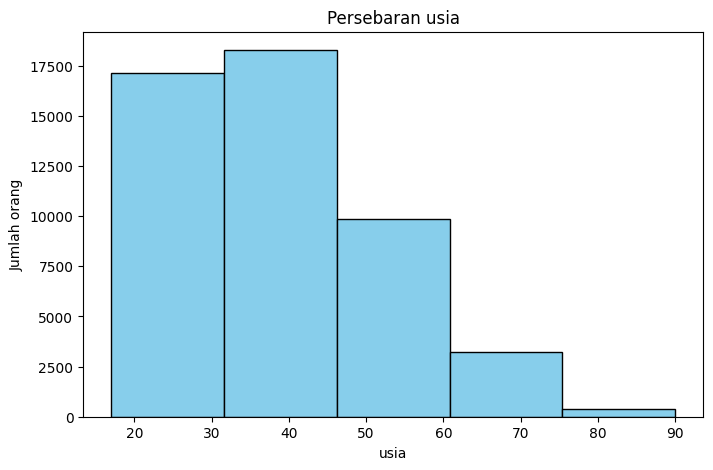

Dataset tersebut memiliki kolom usia dengan rentang persebarannya sekitar umur 18 hingga 90 tahun 


In [12]:
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('usia')
plt.ylabel('Jumlah orang')
plt.title('Persebaran usia')
plt.show()
print("Dataset tersebut memiliki kolom usia dengan rentang persebarannya sekitar umur 18 hingga 90 tahun ")

In [13]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [16]:
x = df[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = df['income']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (39073, 6)
X_test shape: (9769, 6)


# **Decision tree with Gini**

In [19]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
y_pred_gini = clf_gini.predict(x_test)

In [21]:
print("Model accuracy  score with criterion gini: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

Model accuracy  score with criterion gini: 0.8075


In [22]:
print("Training set score: {0:0.4f}".format(clf_gini.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_gini.score(x_test,y_test)))

Training set score: 0.8057
Test set score: 0.8075


[Text(0.5, 0.875, 'x[3] <= 5119.0\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[2] <= 12.5\ngini = 0.326\nsamples = 37222\nvalue = [29577, 7645]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[0] <= 30.5\ngini = 0.24\nsamples = 28610\nvalue = [24613.0, 3997.0]'),
 Text(0.0625, 0.125, 'gini = 0.068\nsamples = 10390\nvalue = [10026, 364]'),
 Text(0.1875, 0.125, 'gini = 0.319\nsamples = 18220\nvalue = [14587, 3633]'),
 Text(0.375, 0.375, 'x[0] <= 29.5\ngini = 0.488\nsamples = 8612\nvalue = [4964, 3648]'),
 Text(0.3125, 0.125, 'gini = 0.213\nsamples = 1866\nvalue = [1640, 226]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 6746\nvalue = [3324, 3422]'),
 Text(0.75, 0.625, 'x[3] <= 7055.5\ngini = 0.101\nsamples = 1851\nvalue = [99, 1752]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 5316.5\ngini = 0.46\nsamples = 217\nvalue = [78, 139]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 113\nvalue = [0, 113]'),
 Text(0.6875, 0.125, 'gini =

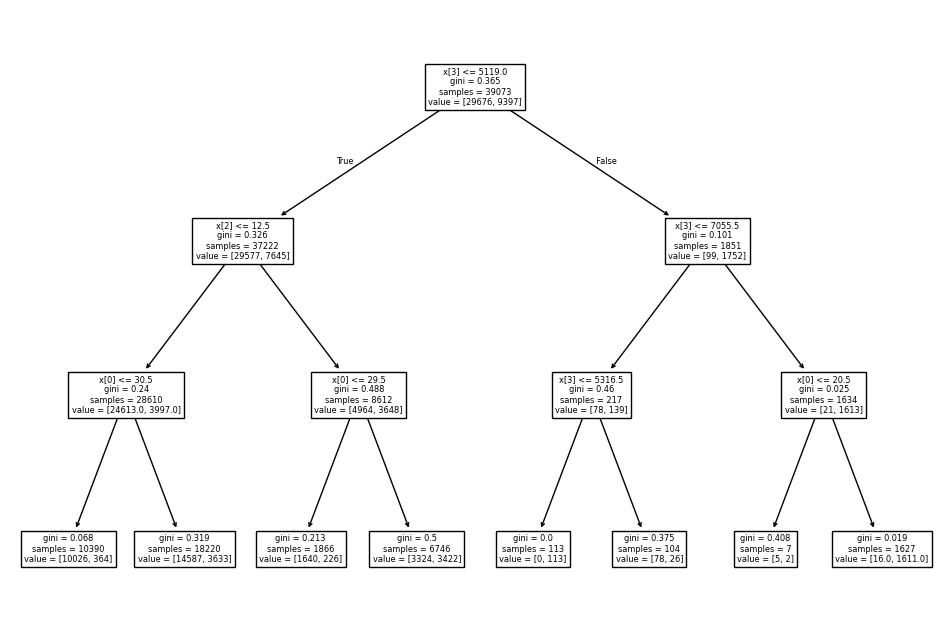

In [23]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [24]:
print("Confusion matrix decision tree with gini")
cy = confusion_matrix(y_test, y_pred_gini)
cy

Confusion matrix decision tree with gini


array([[6612,  867],
       [1014, 1276]])

In [26]:
print("classification report with gini")
print(classification_report(y_test, y_pred_gini))
print("akurasi klasifikasi report menggunakan gini untuk dataset ini sekitar 81%")

classification report with gini
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7479
           1       0.60      0.56      0.58      2290

    accuracy                           0.81      9769
   macro avg       0.73      0.72      0.73      9769
weighted avg       0.80      0.81      0.81      9769

akurasi klasifikasi report menggunakan gini untuk dataset ini sekitar 81%


# **Naive Bayes**

In [27]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [28]:
nb_y_pred = nb_classifier.predict(x_test)

In [29]:
print("Model accuracy  score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test,nb_y_pred)))

#d


cm = confusion_matrix(y_test, nb_y_pred)
cm

Model accuracy  score with Naive Bayes: 0.7992


array([[7098,  381],
       [1581,  709]])

In [31]:
print("Classification Report Naive Bayes")
print(classification_report(y_test, nb_y_pred))
print("klasisfikasi report naive bayes untuk dataset diabetes ini diperoleh akurasi 80 persen")

Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769

klasisfikasi report naive bayes untuk dataset diabetes ini diperoleh akurasi 80 persen


# **K-Nearest Neighbors (KNN)**

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(x_test_scaled)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

Akurasi model: 0.81


In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[6776,  703],
       [1175, 1115]])

In [39]:
print(classification_report(y_test, y_pred))
print("Dataset ini apabila diklasifikasikan menggunakan KNN diperoleh akurasi sekitar 81 persen")

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      7479
           1       0.61      0.49      0.54      2290

    accuracy                           0.81      9769
   macro avg       0.73      0.70      0.71      9769
weighted avg       0.80      0.81      0.80      9769

Dataset ini apabila diklasifikasikan menggunakan KNN diperoleh akurasi sekitar 81 persen
